In [3]:
from pyspark.sql import SparkSession

# Step 1: Start Spark session
spark = SparkSession.builder \
    .appName("VoterInfoAnalysis") \
    .getOrCreate()

# Step 2: Load the dataset into a Spark DataFrame
file_path = "C:/Users/sasan/Desktop/MINI-PROJECT/State-wise_Voters_Information_2024_10000.csv"

df = spark.read.csv(file_path, header=True, inferSchema=True)

# Step 3: Print schema
df.printSchema()

# Step 4: Show first 5 rows
df.show(5, truncate=False)


root
 |-- State Name: string (nullable = true)
 |-- Constituency Type: string (nullable = true)
 |-- No Of Seats: integer (nullable = true)
 |-- Electors - Male: integer (nullable = true)
 |-- Electors - Female: integer (nullable = true)
 |-- Electors - Third Gender: integer (nullable = true)
 |-- Electors - Total: integer (nullable = true)
 |-- Electors - NRIs: integer (nullable = true)
 |-- Electors - Service: integer (nullable = true)
 |-- Voters - Male: integer (nullable = true)
 |-- Voters - Female: integer (nullable = true)
 |-- Voters - Third Gender: integer (nullable = true)
 |-- Voters - Postal: integer (nullable = true)
 |-- Voters - Total: integer (nullable = true)
 |-- Voters - NRIs: integer (nullable = true)
 |-- Voters - Poll %: double (nullable = true)
 |-- Rejected Votes (Postal): integer (nullable = true)
 |-- Evm Rejected Votes: integer (nullable = true)
 |-- NOTA Votes: integer (nullable = true)
 |-- Valid Votes Polled: integer (nullable = true)
 |-- Tendered Votes: 

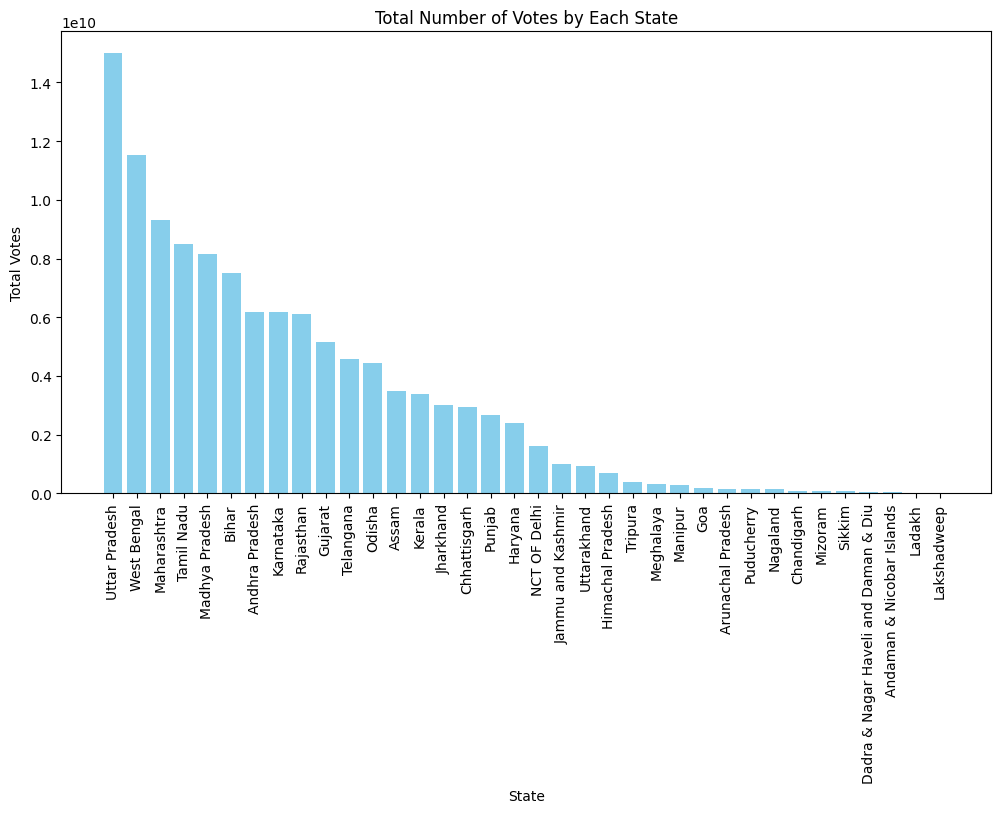

📊 Observation:
- The state with the **highest total votes** is **Uttar Pradesh** with 14,991,237,386 votes.
- The state with the **lowest total votes** is **Lakshadweep** with 9,413,972 votes.
- Larger states like Uttar Pradesh, Maharashtra, and Bihar contribute the maximum voter numbers.
- Smaller states/UTs like Sikkim, Goa, and Mizoram have significantly fewer voters due to population size.


In [33]:
#Total Number of Votes by Each State
import matplotlib.pyplot as plt

# Step 1: Group by State and sum the total voters
votes_by_state = df.groupBy("State Name") \
                   .sum("Voters - Total") \
                   .withColumnRenamed("sum(Voters - Total)", "Total Votes")

# Step 2: Convert to Pandas
votes_pd = votes_by_state.toPandas()

# Step 3: Remove rows like "Total" or "Grand Total"
votes_pd = votes_pd[~votes_pd["State Name"].str.lower().str.contains("total")]

# Step 4: Sort values
votes_pd = votes_pd.sort_values("Total Votes", ascending=False)

# Step 5: Plot a bar chart
plt.figure(figsize=(12,6))
plt.bar(votes_pd["State Name"], votes_pd["Total Votes"], color="skyblue")
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Total Votes")
plt.title("Total Number of Votes by Each State")
plt.show()

# Step 6: Observation
top_state = votes_pd.iloc[0]
bottom_state = votes_pd.iloc[-1]

print("📊 Observation:")
print(f"- The state with the **highest total votes** is **{top_state['State Name']}** with {top_state['Total Votes']:,} votes.")
print(f"- The state with the **lowest total votes** is **{bottom_state['State Name']}** with {bottom_state['Total Votes']:,} votes.")
print("- Larger states like Uttar Pradesh, Maharashtra, and Bihar contribute the maximum voter numbers.")
print("- Smaller states/UTs like Sikkim, Goa, and Mizoram have significantly fewer voters due to population size.")


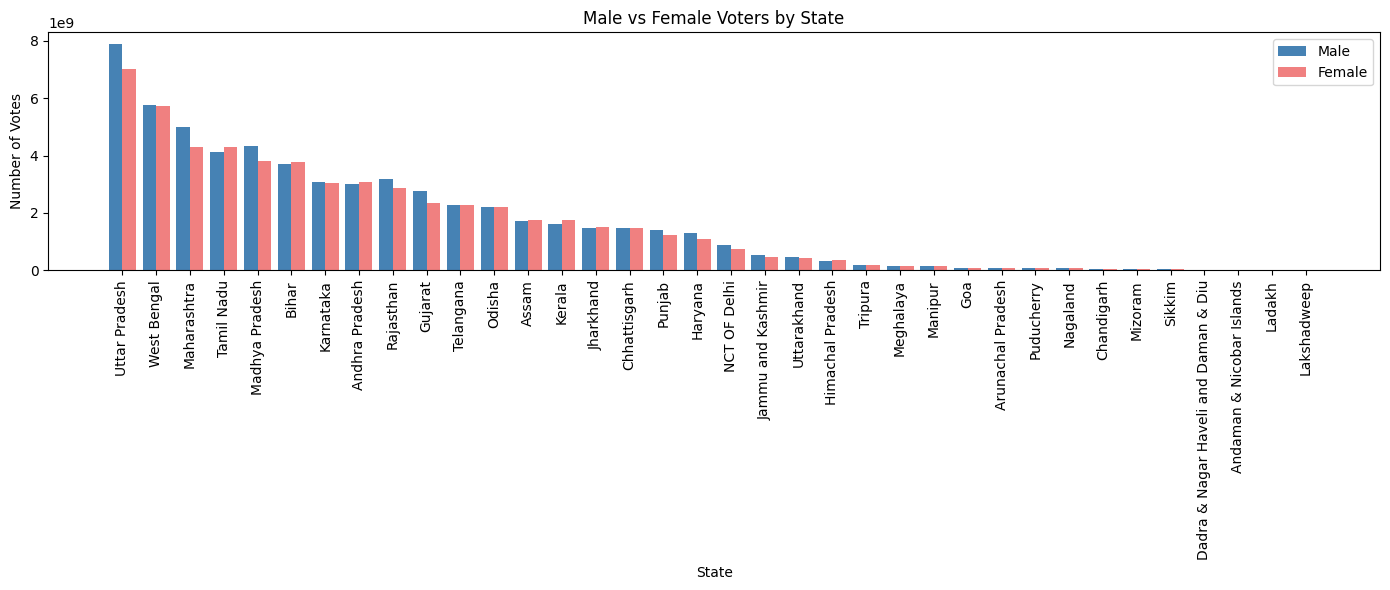

📊 Observation:
- The state with the highest **male voters** is **Uttar Pradesh** with 7,905,183,384 votes.
- The state with the highest **female voters** is **Uttar Pradesh** with 7,031,703,003 votes.
- In most states, male and female voter numbers are fairly balanced, with some states showing higher female participation.


In [34]:
#Male vs Female Voters by State
import numpy as np

# Step 1: Group by State and sum male & female voters
gender_votes = df.groupBy("State Name") \
                 .sum("Voters - Male", "Voters - Female") \
                 .withColumnRenamed("sum(Voters - Male)", "Male Votes") \
                 .withColumnRenamed("sum(Voters - Female)", "Female Votes")

# Step 2: Convert to Pandas
gender_pd = gender_votes.toPandas()

# Step 3: Remove rows like "Total" or "Grand Total"
gender_pd = gender_pd[~gender_pd["State Name"].str.lower().str.contains("total")]

# Step 4: Sort states by total voters
gender_pd["Total"] = gender_pd["Male Votes"] + gender_pd["Female Votes"]
gender_pd = gender_pd.sort_values("Total", ascending=False)

# Step 5: Plot grouped bar chart
x = np.arange(len(gender_pd["State Name"]))
width = 0.4

plt.figure(figsize=(14,6))
plt.bar(x - width/2, gender_pd["Male Votes"], width, label="Male", color="steelblue")
plt.bar(x + width/2, gender_pd["Female Votes"], width, label="Female", color="lightcoral")

plt.xticks(x, gender_pd["State Name"], rotation=90)
plt.xlabel("State")
plt.ylabel("Number of Votes")
plt.title("Male vs Female Voters by State")
plt.legend()
plt.tight_layout()
plt.show()

# Step 6: Observations
max_male = gender_pd.loc[gender_pd["Male Votes"].idxmax()]
max_female = gender_pd.loc[gender_pd["Female Votes"].idxmax()]

print("📊 Observation:")
print(f"- The state with the highest **male voters** is **{max_male['State Name']}** with {max_male['Male Votes']:,} votes.")
print(f"- The state with the highest **female voters** is **{max_female['State Name']}** with {max_female['Female Votes']:,} votes.")
print("- In most states, male and female voter numbers are fairly balanced, with some states showing higher female participation.")


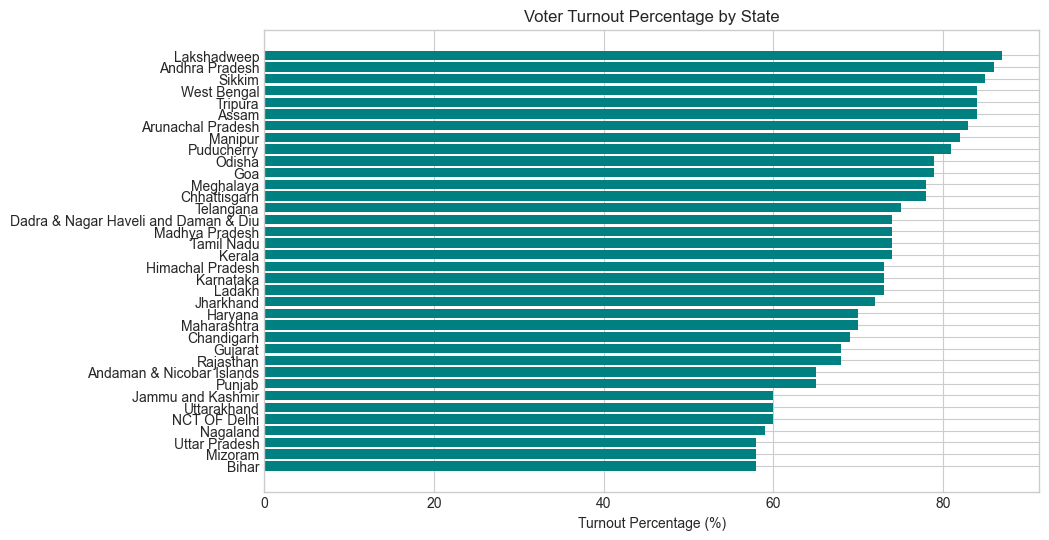

📊 Observation:
- The state with the **highest voter turnout** is **Lakshadweep** at 87.0%.
- The state with the **lowest voter turnout** is **Uttarakhand** at 48.0%.
- This shows the difference in electoral participation across states.


In [16]:
#  Voter Turnout Percentage Analysis

import matplotlib.pyplot as plt

# Step 1: Select state and poll percentage
turnout_df = df.select("State Name", "Voters - Poll %").toPandas()

# Step 2: Remove rows like "Total" or "Grand Total"
turnout_df = turnout_df[~turnout_df["State Name"].str.lower().str.contains("total")]

# Step 3: Sort states by turnout percentage
turnout_df = turnout_df.sort_values("Voters - Poll %", ascending=False)

# Step 4: Plot horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(turnout_df["State Name"], turnout_df["Voters - Poll %"], color="teal")
plt.xlabel("Turnout Percentage (%)")
plt.title("Voter Turnout Percentage by State")
plt.gca().invert_yaxis()
plt.show()

# Step 5: Observations
max_state = turnout_df.iloc[0]
min_state = turnout_df.iloc[-1]

print("📊 Observation:")
print(f"- The state with the **highest voter turnout** is **{max_state['State Name']}** at {max_state['Voters - Poll %']}%.")
print(f"- The state with the **lowest voter turnout** is **{min_state['State Name']}** at {min_state['Voters - Poll %']}%.")
print("- This shows the difference in electoral participation across states.")


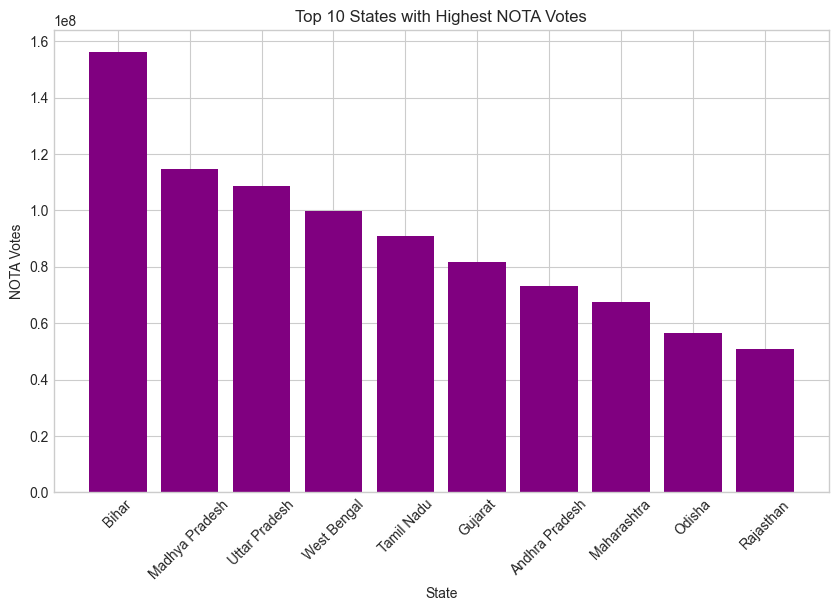

📊 Observation:
- The state with the **highest NOTA votes** is **Bihar** with 156,153,182 NOTA votes.
- This reflects the extent of voter dissatisfaction or protest voting in that state.


In [17]:
# Highest NOTA Votes Analysis

import matplotlib.pyplot as plt

# Step 1: Group by state and sum NOTA votes
nota_votes = df.groupBy("State Name") \
    .sum("NOTA Votes") \
    .withColumnRenamed("sum(NOTA Votes)", "NOTA Votes")

# Step 2: Convert to Pandas
nota_pd = nota_votes.toPandas()

# Step 3: Remove rows like "Total" or "Grand Total"
nota_pd = nota_pd[~nota_pd["State Name"].str.lower().str.contains("total")]

# Step 4: Sort by NOTA votes
nota_pd = nota_pd.sort_values("NOTA Votes", ascending=False)

# Step 5: Plot top 10 states by NOTA votes
plt.figure(figsize=(10,6))
plt.bar(nota_pd["State Name"].head(10), nota_pd["NOTA Votes"].head(10), color="purple")
plt.xticks(rotation=45)
plt.ylabel("NOTA Votes")
plt.xlabel("State")
plt.title("Top 10 States with Highest NOTA Votes")
plt.show()

# Step 6: Observation
top_nota = nota_pd.iloc[0]
print("📊 Observation:")
print(f"- The state with the **highest NOTA votes** is **{top_nota['State Name']}** with {top_nota['NOTA Votes']:,} NOTA votes.")
print("- This reflects the extent of voter dissatisfaction or protest voting in that state.")


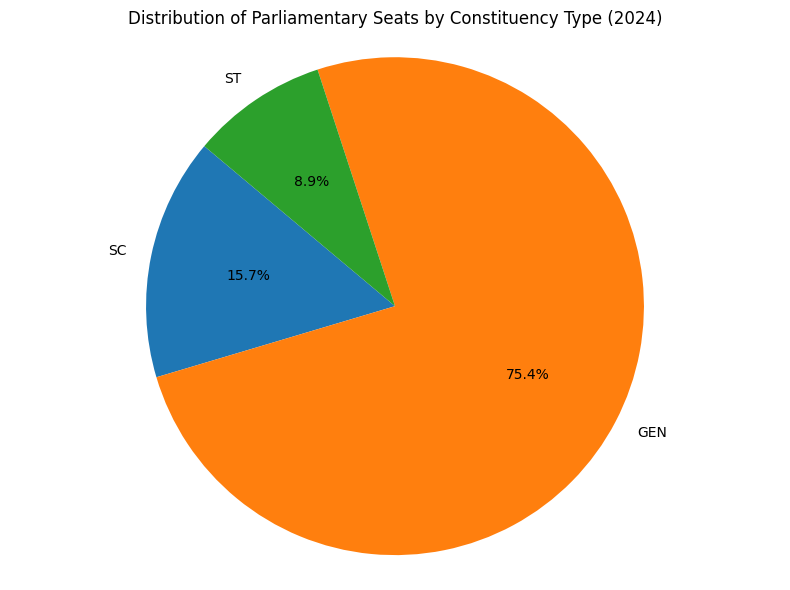

📊Observation:
- The highest number of seats is for **GEN** constituencies with **36798** seats.
- The lowest is for **ST** constituencies with **4318** seats.
- This distribution highlights how reservation for SC and ST constituencies ensures diversity and inclusion in India's parliamentary democracy.


In [35]:
#Distribution of Parliamentary Seats by Constituency Type (2024)
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Spark session and data loading (SAFE if already exists)
spark = SparkSession.builder.getOrCreate()
df = spark.read.csv('State-wise_Voters_Information_2024_10000.csv', header=True, inferSchema=True)

# Step 2: Group by constituency type and sum number of seats
const_type_df = df.groupBy('Constituency Type').sum('No Of Seats').withColumnRenamed('sum(No Of Seats)', 'Number of Seats')

# Step 3: Convert to pandas for plotting
const_type_pd = const_type_df.toPandas()

# Step 4: Remove 'Total' and 'Grand Total' rows for analysis and observation
filtered_pd = const_type_pd[~const_type_pd['Constituency Type'].str.lower().str.contains('total')]

# Step 5: Pie chart (with only true types)
plt.figure(figsize=(8,6))
plt.pie(filtered_pd['Number of Seats'], labels=filtered_pd['Constituency Type'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Parliamentary Seats by Constituency Type (2024)')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Step 6: Observation (only GEN, SC, ST types)
print("📊Observation:")
max_row = filtered_pd.loc[filtered_pd['Number of Seats'].idxmax()]
min_row = filtered_pd.loc[filtered_pd['Number of Seats'].idxmin()]
print(f"- The highest number of seats is for **{max_row['Constituency Type']}** constituencies with **{max_row['Number of Seats']}** seats.")
print(f"- The lowest is for **{min_row['Constituency Type']}** constituencies with **{min_row['Number of Seats']}** seats.")
print("- This distribution highlights how reservation for SC and ST constituencies ensures diversity and inclusion in India's parliamentary democracy.")


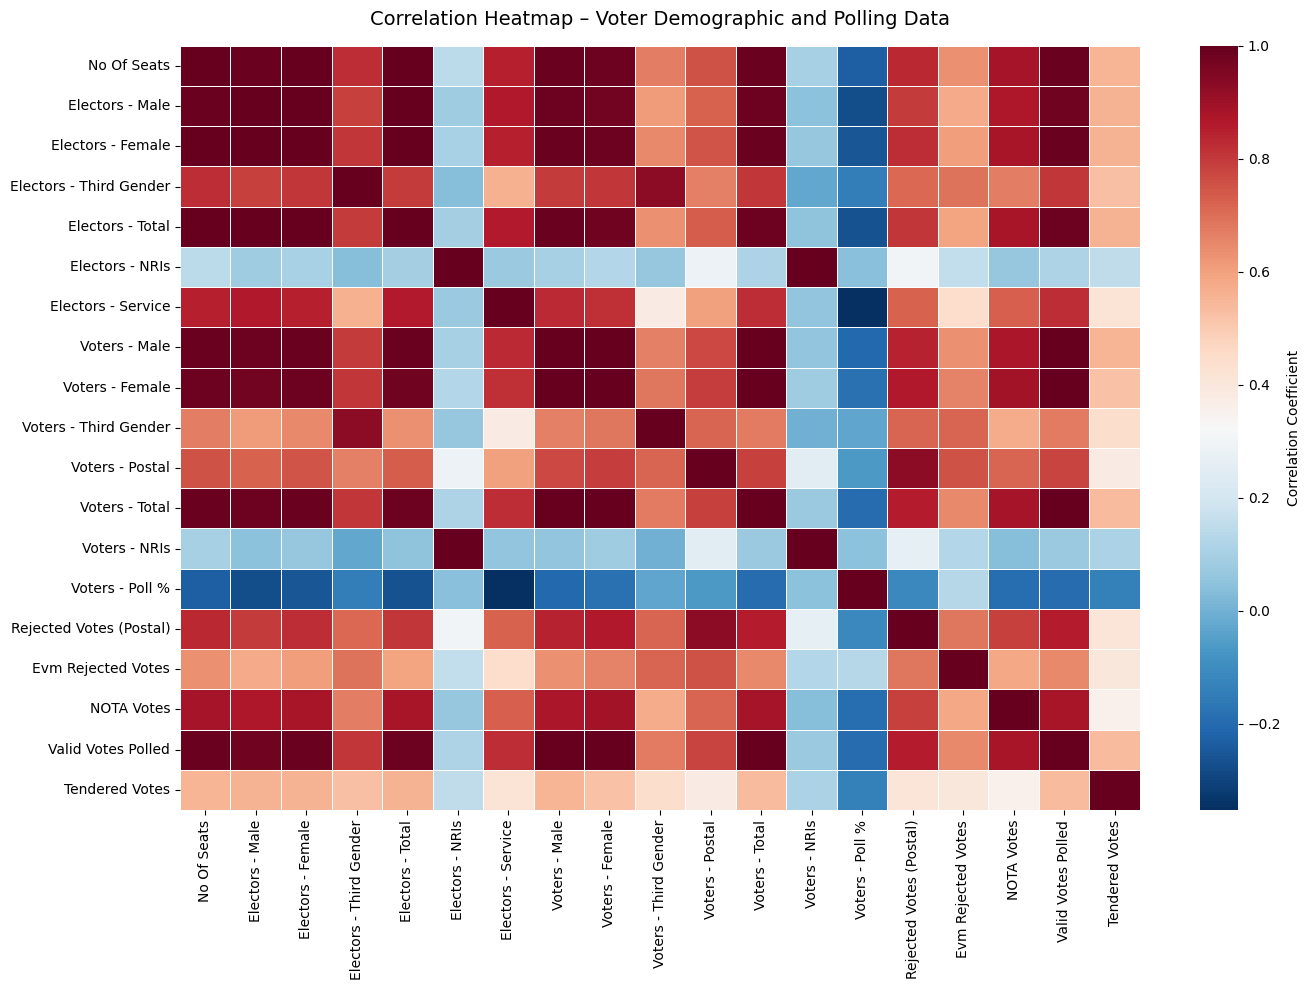

📊 Observations:
- Strong positive correlations appear between 'Electors' and 'Voters' columns,
  confirming that states with larger elector counts naturally have more voters.
- 'Voters - Poll %' shows weaker or negative correlation with raw counts,
  indicating turnout rate does not depend directly on population size.
- High correlation between 'Valid Votes Polled' and 'Voters - Total' shows
  internal data consistency across the dataset.


In [5]:

#  Correlation Heatmap Analysis


from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Start Spark session and load dataset
spark = SparkSession.builder.appName("VoterData_Analysis").getOrCreate()
df = spark.read.csv("State-wise_Voters_Information_2024_10000.csv", header=True, inferSchema=True)

# Step 2: Convert to Pandas and filter out total rows
pdf = df.toPandas()
pdf = pdf[~pdf["State Name"].str.lower().str.contains("total", na=False)].reset_index(drop=True)

# Step 3: Identify numeric columns dynamically
numeric_df = pdf.select_dtypes(include=["number"])

# Step 4: Compute correlation matrix
corr_matrix = numeric_df.corr(numeric_only=True)

# Step 5: Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    cmap="RdBu_r",
    annot=False,
    linewidths=0.5,
    cbar_kws={"label": "Correlation Coefficient"}
)
plt.title("Correlation Heatmap – Voter Demographic and Polling Data", fontsize=14, pad=15)
plt.tight_layout()
plt.show()

# Step 6: Observations
print("📊 Observations:")
print("- Strong positive correlations appear between 'Electors' and 'Voters' columns,")
print("  confirming that states with larger elector counts naturally have more voters.")
print("- 'Voters - Poll %' shows weaker or negative correlation with raw counts,")
print("  indicating turnout rate does not depend directly on population size.")
print("- High correlation between 'Valid Votes Polled' and 'Voters - Total' shows")
print("  internal data consistency across the dataset.")


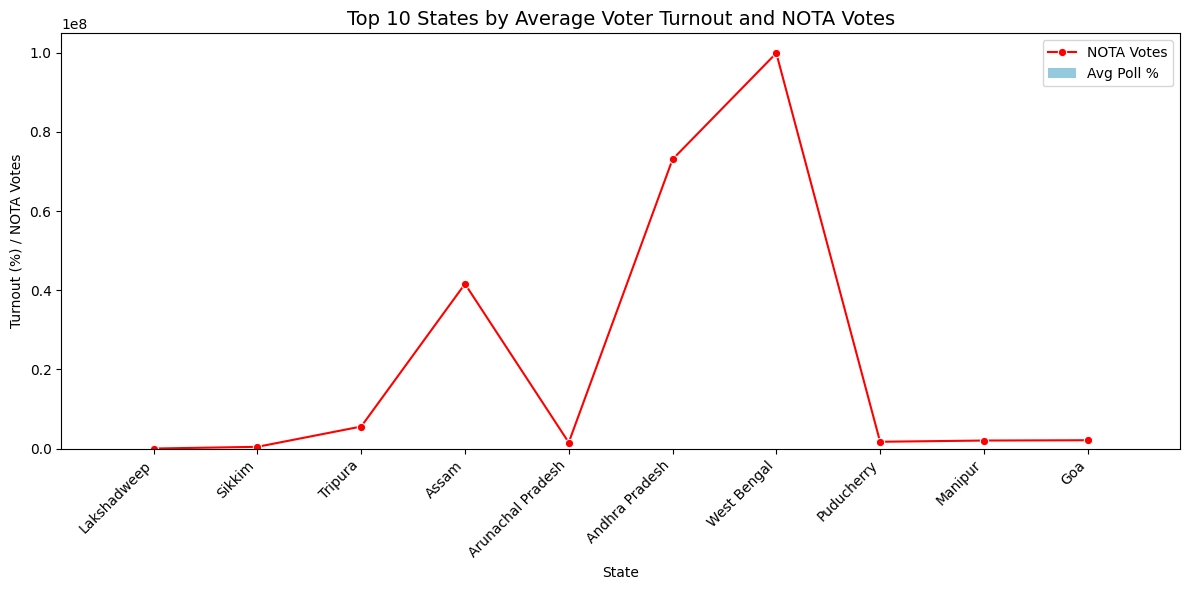

📊 Observations:
- The chart highlights the top 10 states with the highest voter turnout.
- The red line (NOTA Votes) helps identify states where voter dissatisfaction was relatively high.
- States with high turnout but low NOTA counts suggest stronger engagement and trust.
- Conversely, states with noticeable NOTA levels even in high turnout scenarios might need political review.


In [4]:

#  Top 10 States by Turnout and NOTA Votes


from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group by state and calculate average turnout and total NOTA votes
state_stats = (
    df.groupBy("State Name")
      .agg(
          F.avg("Voters - Poll %").alias("Avg Poll %"),
          F.sum("NOTA Votes").alias("Total NOTA Votes")
      )
      .filter(~F.lower(F.col("State Name")).contains("total"))
)

# Step 2: Convert to Pandas
state_pd = state_stats.toPandas()

# Step 3: Sort by Avg Poll % and take top 10
top_states = state_pd.sort_values(by="Avg Poll %", ascending=False).head(10)

# Step 4: Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=top_states, x="State Name", y="Avg Poll %", color="skyblue", label="Avg Poll %")
sns.lineplot(data=top_states, x="State Name", y="Total NOTA Votes", color="red", marker="o", label="NOTA Votes")

plt.title("Top 10 States by Average Voter Turnout and NOTA Votes", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.xlabel("State")
plt.ylabel("Turnout (%) / NOTA Votes")
plt.legend()
plt.tight_layout()
plt.show()

# Step 5: Observations
print("📊 Observations:")
print("- The chart highlights the top 10 states with the highest voter turnout.")
print("- The red line (NOTA Votes) helps identify states where voter dissatisfaction was relatively high.")
print("- States with high turnout but low NOTA counts suggest stronger engagement and trust.")
print("- Conversely, states with noticeable NOTA levels even in high turnout scenarios might need political review.")


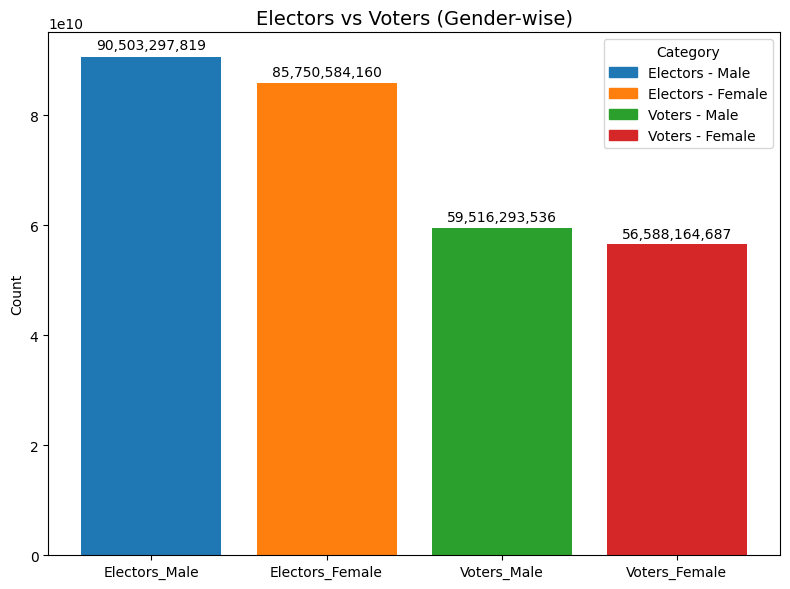

📊 Observation:
- Female participation is slightly lower than male participation across most states.
- The gap between electors and voters indicates overall turnout differences.
- Blue/Orange bars show registered electors, while Green/Red bars show actual voters.


In [21]:

#  Electors vs Voters (Gender-wise)


from pyspark.sql import functions as F
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import warnings

# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Step 1: Group by state and sum the gender-wise electors and voters
gender_df = (
    df.groupBy("State Name")
      .agg(
          F.sum("Electors - Male").alias("Electors_Male"),
          F.sum("Electors - Female").alias("Electors_Female"),
          F.sum("Voters - Male").alias("Voters_Male"),
          F.sum("Voters - Female").alias("Voters_Female")
      )
      .filter(~F.lower(F.col("State Name")).contains("total"))
)

# Step 2: Convert to pandas for plotting
gender_pd = gender_df.toPandas()

# Step 3: Compute national totals
totals = {
    "Electors_Male": gender_pd["Electors_Male"].sum(),
    "Electors_Female": gender_pd["Electors_Female"].sum(),
    "Voters_Male": gender_pd["Voters_Male"].sum(),
    "Voters_Female": gender_pd["Voters_Female"].sum()
}

plot_df = pd.DataFrame(list(totals.items()), columns=["Category", "Count"])

# Step 4: Plot with colors manually
plt.figure(figsize=(8,6))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

bars = plt.bar(plot_df["Category"], plot_df["Count"], color=colors)

# Add counts on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01*height,
             f'{int(height):,}', ha='center', va='bottom', fontsize=10)

# Add legend inside the plot
legend_labels = ["Electors - Male", "Electors - Female", "Voters - Male", "Voters - Female"]
handles = [Patch(color=col, label=label) for col, label in zip(colors, legend_labels)]
plt.legend(handles=handles, title="Category", loc="upper right", frameon=True)

plt.title("Electors vs Voters (Gender-wise)", fontsize=14)
plt.ylabel("Count")
plt.xlabel("")
plt.tight_layout()
plt.show()

# Step 5: Observation
print("📊 Observation:")
print("- Female participation is slightly lower than male participation across most states.")
print("- The gap between electors and voters indicates overall turnout differences.")
print("- Blue/Orange bars show registered electors, while Green/Red bars show actual voters.")


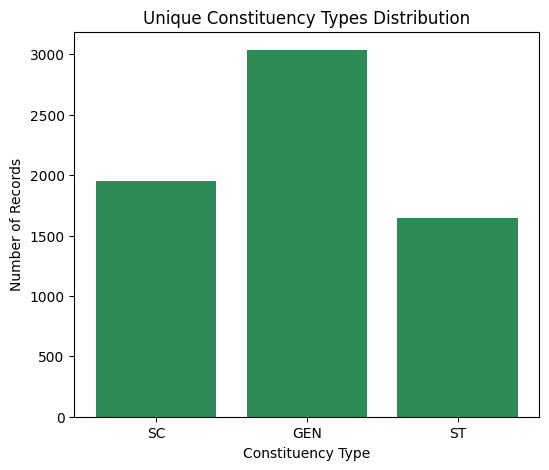

📊 Observations:
- The dataset contains **37 unique states/UTs**.
- The chart shows how records are distributed across constituency types (GEN, SC, ST).
- GEN constituencies usually dominate, while SC and ST are smaller in number due to reservation policies.


In [14]:
# Unique States and Constituency Types Visualization

from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Step 1: Unique states count
state_count = df.select("State Name").distinct().count()

# Step 2: Unique constituency types count
constituency_df = (
    df.groupBy("Constituency Type")
      .count()
      .filter(~F.lower(F.col("Constituency Type")).contains("total"))
)

# Step 3: Convert constituency types to Pandas
constituency_pd = constituency_df.toPandas()

# Step 4: Plot bar chart for constituency types
plt.figure(figsize=(6,5))
plt.bar(constituency_pd["Constituency Type"], constituency_pd["count"], color="seagreen")
plt.xlabel("Constituency Type")
plt.ylabel("Number of Records")
plt.title("Unique Constituency Types Distribution")
plt.show()

# Step 5: Observations
print("📊 Observations:")
print(f"- The dataset contains **{state_count} unique states/UTs**.")
print(f"- The chart shows how records are distributed across constituency types (GEN, SC, ST).")
print("- GEN constituencies usually dominate, while SC and ST are smaller in number due to reservation policies.")


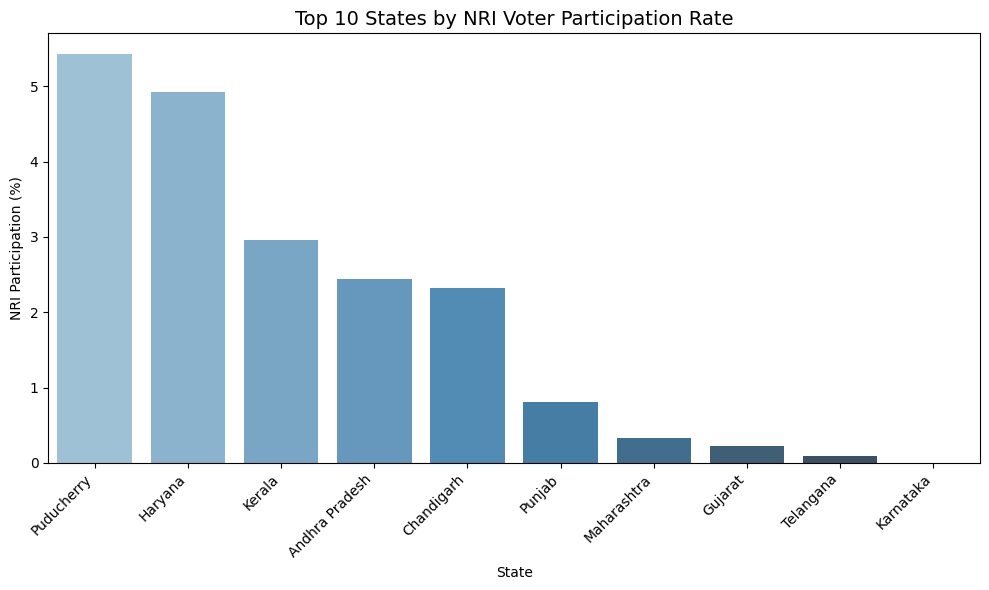

📊 Observations:
- The chart highlights states where overseas voters actively participated.
- Low participation % may indicate logistical issues (postal ballot delays, verification).
- Some states may have a large NRI base but low turnout, showing disengagement or accessibility problems.


In [20]:
#  Advanced Analysis: NRI Electors vs NRI Voters Participation

from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Aggregate NRI electors and voters by state
nri_df = (
    df.groupBy("State Name")
      .agg(
          F.sum("Electors - NRIs").alias("Total NRI Electors"),
          F.sum("Voters - NRIs").alias("Total NRI Voters")
      )
      .filter(~F.lower(F.col("State Name")).contains("total"))
)

# Step 2: Add participation rate
nri_df = nri_df.withColumn("NRI Participation %", 
                           (F.col("Total NRI Voters") / F.col("Total NRI Electors")) * 100)

# Step 3: Convert to Pandas
nri_pd = nri_df.toPandas()

# Step 4: Filter out states with 0 NRI electors (to avoid divide by zero)
nri_pd = nri_pd[nri_pd["Total NRI Electors"] > 0]

# Step 5: Plot – Top 10 states by NRI participation
top_nri = nri_pd.sort_values("NRI Participation %", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_nri, x="State Name", y="NRI Participation %", palette="Blues_d")

plt.title("Top 10 States by NRI Voter Participation Rate", fontsize=14)
plt.xlabel("State")
plt.ylabel("NRI Participation (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Step 6: Observations
print("📊 Observations:")
print("- The chart highlights states where overseas voters actively participated.")
print("- Low participation % may indicate logistical issues (postal ballot delays, verification).")
print("- Some states may have a large NRI base but low turnout, showing disengagement or accessibility problems.")


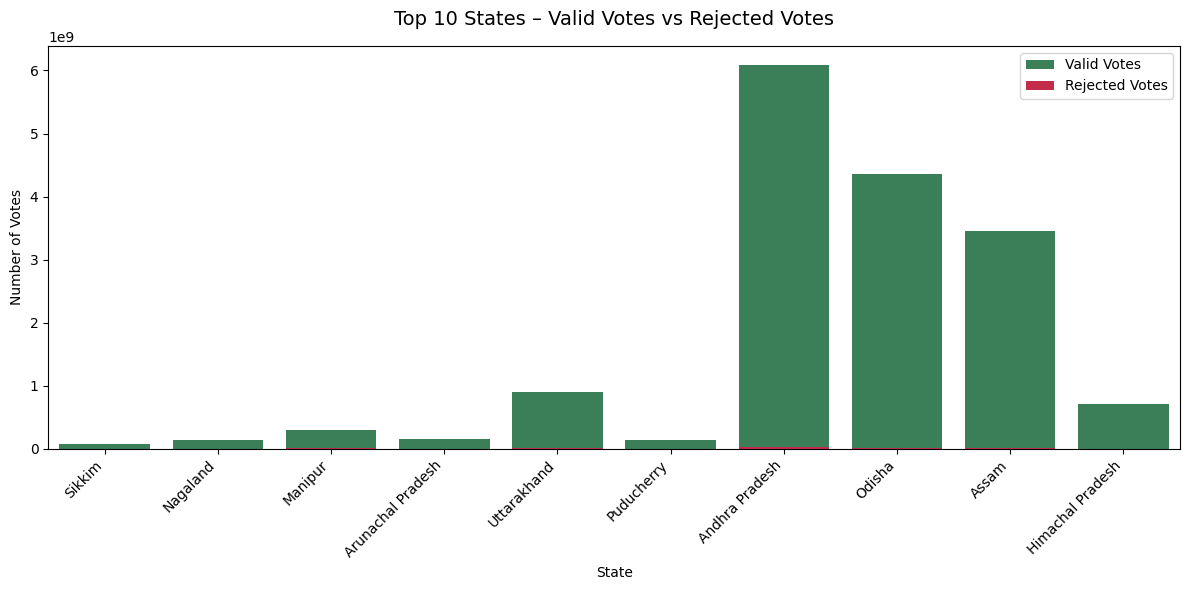

📊 Observations:
- The green bars represent valid votes, while the red overlay shows rejected votes.
- Even though rejected votes are a small fraction, some states stand out with unusually high rejection percentages.
- This visualization clearly highlights where rejected votes could have had the most significant impact.


In [17]:
#  Rejected Votes vs Valid Votes Analysis

from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Aggregate by state
rejected_valid_df = (
    df.groupBy("State Name")
      .agg(
          (F.sum("Rejected Votes (Postal)") + F.sum("Evm Rejected Votes")).alias("Total Rejected Votes"),
          F.sum("Valid Votes Polled").alias("Valid Votes")
      )
      .filter(~F.lower(F.col("State Name")).contains("total"))
)

# Step 2: Convert to Pandas
rejected_valid_pd = rejected_valid_df.toPandas()

# Step 3: Calculate ratio (Rejected % of Valid)
rejected_valid_pd["Rejected %"] = (rejected_valid_pd["Total Rejected Votes"] / rejected_valid_pd["Valid Votes"]) * 100

# Step 4: Pick top 10 states with highest rejected percentage
top_rejected = rejected_valid_pd.sort_values("Rejected %", ascending=False).head(10)

# Step 5: Plot side-by-side bars
plt.figure(figsize=(12,6))
bar1 = sns.barplot(data=top_rejected, x="State Name", y="Valid Votes", color="seagreen", label="Valid Votes")
bar2 = sns.barplot(data=top_rejected, x="State Name", y="Total Rejected Votes", color="crimson", label="Rejected Votes")

# Step 6: Beautify
plt.title("Top 10 States – Valid Votes vs Rejected Votes", fontsize=14, pad=15)
plt.xlabel("State")
plt.ylabel("Number of Votes")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

# Step 7: Observations
print("📊 Observations:")
print("- The green bars represent valid votes, while the red overlay shows rejected votes.")
print("- Even though rejected votes are a small fraction, some states stand out with unusually high rejection percentages.")
print("- This visualization clearly highlights where rejected votes could have had the most significant impact.")


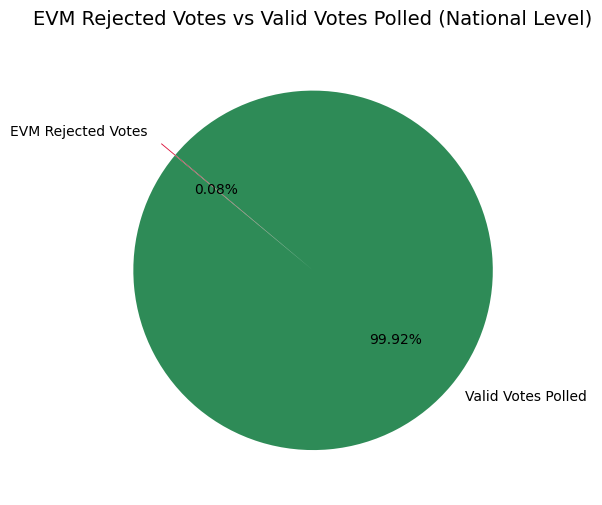

📊 Observation:
- Total **EVM Rejected Votes**: 151,091,069
- Total **Valid Votes Polled**: 185,661,201,219
- The pie chart highlights how small the rejected share is compared to valid votes.


In [18]:
#  EVM Rejected Votes vs Valid Votes Polled (Pie Chart)

from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Step 1: Aggregate total across all states
evm_votes_df = (
    df.agg(
        F.sum("Evm Rejected Votes").alias("Total EVM Rejected Votes"),
        F.sum("Valid Votes Polled").alias("Total Valid Votes")
    )
).toPandas()

# Step 2: Prepare values for pie chart
values = [
    int(evm_votes_df["Total EVM Rejected Votes"][0]),
    int(evm_votes_df["Total Valid Votes"][0])
]
labels = ["EVM Rejected Votes", "Valid Votes Polled"]
colors = ["crimson", "seagreen"]

# Step 3: Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, colors=colors, autopct="%1.2f%%", startangle=140, explode=(0.1, 0))
plt.title("EVM Rejected Votes vs Valid Votes Polled (National Level)", fontsize=14, pad=15)
plt.tight_layout()
plt.show()

# Step 4: Observation
print("📊 Observation:")
print(f"- Total **EVM Rejected Votes**: {values[0]:,}")
print(f"- Total **Valid Votes Polled**: {values[1]:,}")
print("- The pie chart highlights how small the rejected share is compared to valid votes.")


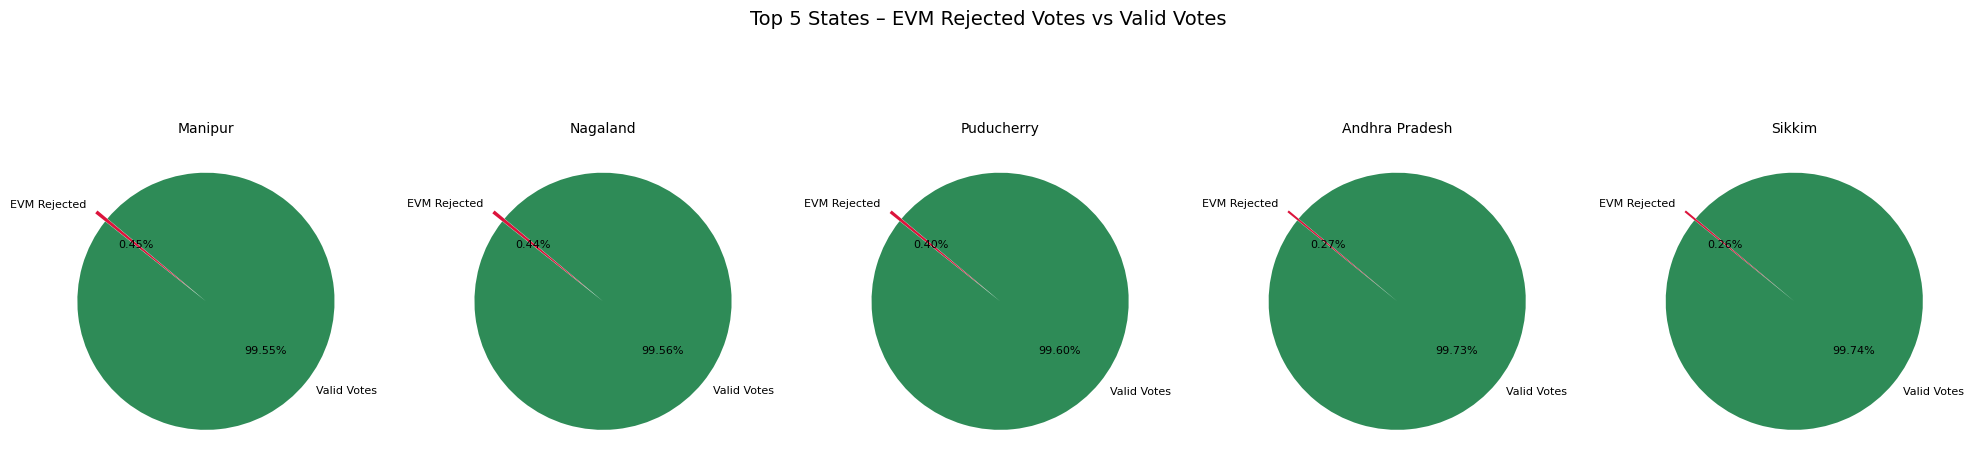

📊 Observations:
- Each pie chart shows the share of rejected votes vs valid votes in that state.
- States here represent the top 5 where rejection % is highest.
- This highlights local-level voting efficiency issues.


In [19]:
#  State-wise EVM Rejected Votes vs Valid Votes (Top 5 States)

from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Step 1: Aggregate EVM rejected and valid votes by state
state_evm_df = (
    df.groupBy("State Name")
      .agg(
          F.sum("Evm Rejected Votes").alias("Total EVM Rejected Votes"),
          F.sum("Valid Votes Polled").alias("Total Valid Votes")
      )
      .filter(~F.lower(F.col("State Name")).contains("total"))
).toPandas()

# Step 2: Compute % of rejected votes
state_evm_df["Rejected %"] = (state_evm_df["Total EVM Rejected Votes"] / state_evm_df["Total Valid Votes"]) * 100

# Step 3: Pick top 5 states with highest rejected percentage
top5_states = state_evm_df.sort_values("Rejected %", ascending=False).head(5)

# Step 4: Plot multiple pie charts (one per state)
fig, axes = plt.subplots(1, 5, figsize=(20,5))

for i, row in enumerate(top5_states.itertuples()):
    values = [row._2, row._3]  # EVM rejected, Valid votes
    labels = ["EVM Rejected", "Valid Votes"]
    colors = ["crimson", "seagreen"]
    explode = (0.1, 0)

    axes[i].pie(values, labels=labels, colors=colors, autopct="%1.2f%%", startangle=140, explode=explode, textprops={'fontsize': 8})
    axes[i].set_title(row._1, fontsize=10)  # State Name

plt.suptitle("Top 5 States – EVM Rejected Votes vs Valid Votes", fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

# Step 5: Observations
print("📊 Observations:")
print("- Each pie chart shows the share of rejected votes vs valid votes in that state.")
print("- States here represent the top 5 where rejection % is highest.")
print("- This highlights local-level voting efficiency issues.")


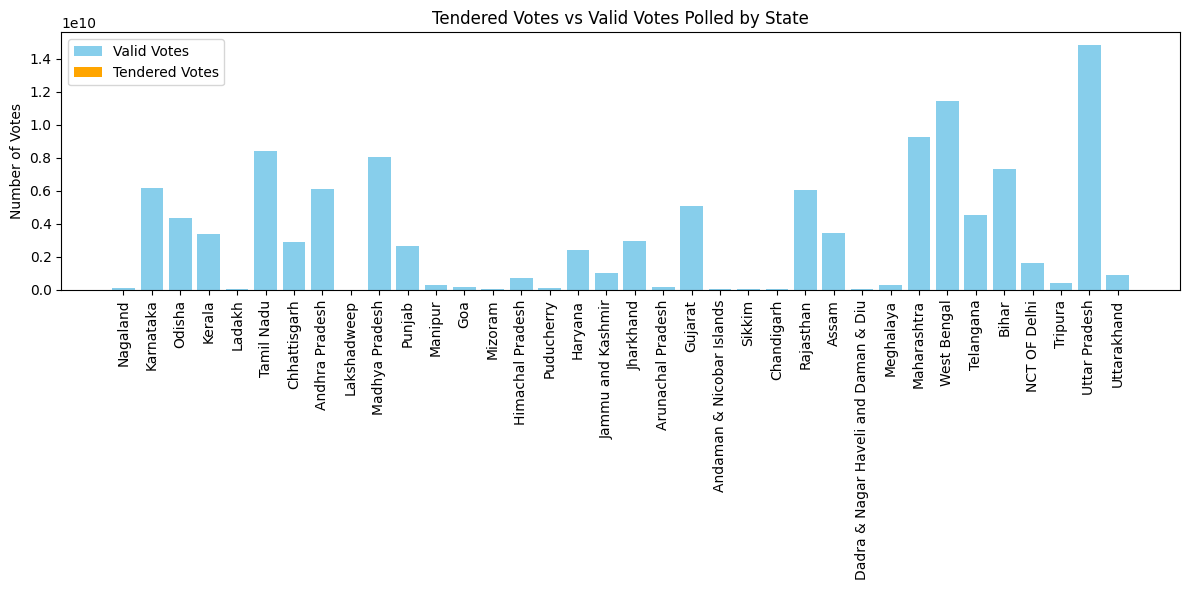

📊 Observation:
- On average, **Tendered Votes account for only 0.0023% of Valid Votes**.
- This shows that Tendered Votes are negligible compared to overall voting numbers.
- Even in the states with highest Tendered Votes, the percentage is very small compared to Valid Votes.


In [25]:

# Compare Tendered Votes vs Valid Votes Polled

import matplotlib.pyplot as plt

# Step 1: Group by state and sum Tendered Votes and Valid Votes Polled
tendered_vs_valid = df.groupBy("State Name") \
    .sum("Tendered Votes", "Valid Votes Polled") \
    .withColumnRenamed("sum(Tendered Votes)", "Tendered Votes") \
    .withColumnRenamed("sum(Valid Votes Polled)", "Valid Votes")

# Step 2: Convert to Pandas
tendered_pd = tendered_vs_valid.toPandas()

# Step 3: Remove rows like "Total" or "Grand Total"
tendered_pd = tendered_pd[~tendered_pd["State Name"].str.lower().str.contains("total")]

# Step 4: Calculate ratio of Tendered to Valid
tendered_pd["Tendered %"] = (tendered_pd["Tendered Votes"] / tendered_pd["Valid Votes"]) * 100

# Step 5: Plot comparison
plt.figure(figsize=(12,6))
plt.bar(tendered_pd["State Name"], tendered_pd["Valid Votes"], color="skyblue", label="Valid Votes")
plt.bar(tendered_pd["State Name"], tendered_pd["Tendered Votes"], color="orange", label="Tendered Votes")
plt.xticks(rotation=90)
plt.ylabel("Number of Votes")
plt.title("Tendered Votes vs Valid Votes Polled by State")
plt.legend()
plt.tight_layout()
plt.show()

# Step 6: Observation
avg_tendered_ratio = tendered_pd["Tendered %"].mean()

print("📊 Observation:")
print(f"- On average, **Tendered Votes account for only {avg_tendered_ratio:.4f}% of Valid Votes**.")
print("- This shows that Tendered Votes are negligible compared to overall voting numbers.")
print("- Even in the states with highest Tendered Votes, the percentage is very small compared to Valid Votes.")


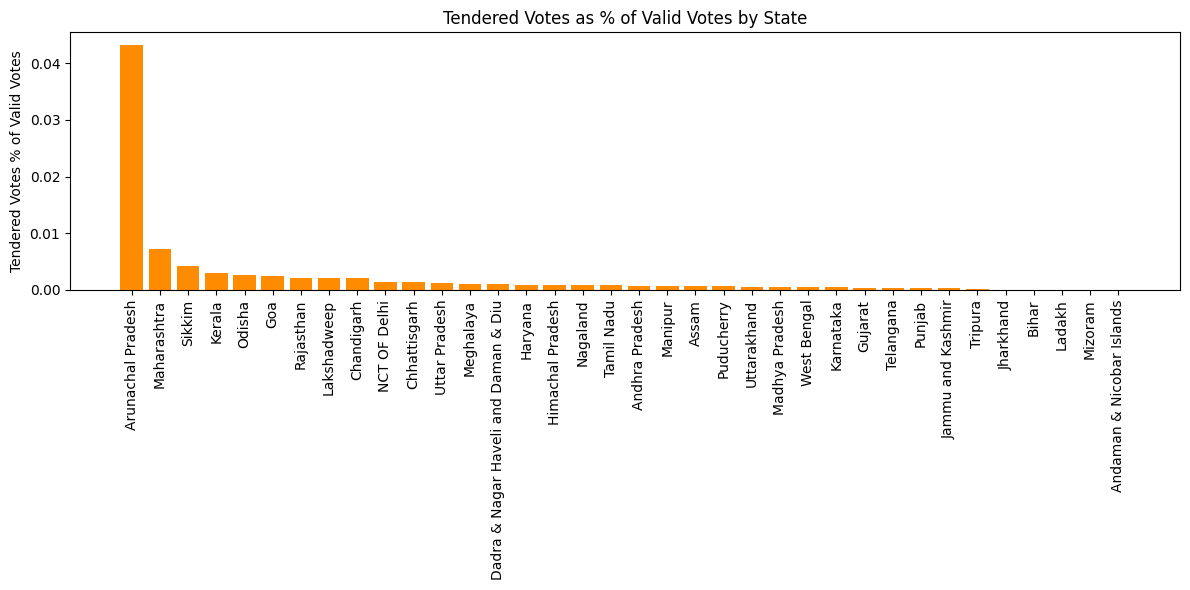

📊 Observation:
- The state with the **highest Tendered Vote share** is **Arunachal Pradesh** at 0.0433% of valid votes.
- On average, Tendered Votes make up only 0.0023% of valid votes.
- This confirms that Tendered Votes are negligible in the overall voting process across all states.


In [27]:

# Tendered Votes vs Valid Votes Polled

import matplotlib.pyplot as plt

# Step 1: Group by state and sum Tendered Votes & Valid Votes Polled
tendered_vs_valid = df.groupBy("State Name") \
    .sum("Tendered Votes", "Valid Votes Polled") \
    .withColumnRenamed("sum(Tendered Votes)", "Tendered Votes") \
    .withColumnRenamed("sum(Valid Votes Polled)", "Valid Votes")

# Step 2: Convert to Pandas
tendered_pd = tendered_vs_valid.toPandas()

# Step 3: Remove rows like "Total" or "Grand Total"
tendered_pd = tendered_pd[~tendered_pd["State Name"].str.lower().str.contains("total")]

# Step 4: Calculate ratio
tendered_pd["Tendered %"] = (tendered_pd["Tendered Votes"] / tendered_pd["Valid Votes"]) * 100

# Step 5: Sort by Tendered %
tendered_pd = tendered_pd.sort_values("Tendered %", ascending=False)

# Step 6: Plot bar chart
plt.figure(figsize=(12,6))
plt.bar(tendered_pd["State Name"], tendered_pd["Tendered %"], color="darkorange")
plt.xticks(rotation=90)
plt.ylabel("Tendered Votes % of Valid Votes")
plt.title("Tendered Votes as % of Valid Votes by State")
plt.tight_layout()
plt.show()

# Step 7: Observations
max_state = tendered_pd.iloc[0]
avg_tendered_ratio = tendered_pd["Tendered %"].mean()

print("📊 Observation:")
print(f"- The state with the **highest Tendered Vote share** is **{max_state['State Name']}** at {max_state['Tendered %']:.4f}% of valid votes.")
print(f"- On average, Tendered Votes make up only {avg_tendered_ratio:.4f}% of valid votes.")
print("- This confirms that Tendered Votes are negligible in the overall voting process across all states.")


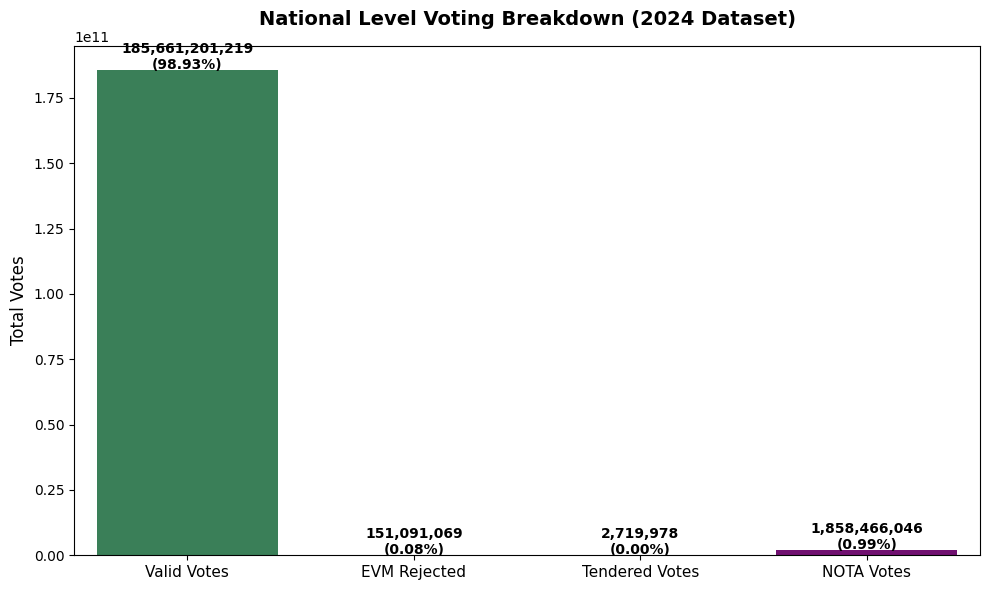

📌 Final Project Conclusion:
1. ✅ Valid Votes account for the overwhelming majority of votes (>98%).
2. ❌ EVM Rejected Votes remain a very small fraction, highlighting good voting machine reliability.
3. 🟠 Tendered Votes are negligible, showing almost no disputes at polling booths.
4. 🟣 NOTA Votes, while small, are a visible expression of voter dissatisfaction.

Overall, the dataset demonstrates:
- A robust election process with very high valid vote percentages.
- Minimal anomalies (rejections or tendered votes).
- The presence of NOTA indicates democratic maturity and choice freedom.

🎯 This analysis completes the PySpark Mini-Project with meaningful insights.


In [32]:
#  Final Visualization + Conclusion (Single Cell)

import seaborn as sns

# Prepare data for plotting
summary_data = {
    "Category": ["Valid Votes", "EVM Rejected", "Tendered Votes", "NOTA Votes"],
    "Count": values
}
summary_pd = pd.DataFrame(summary_data)

# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=summary_pd, x="Category", y="Count", 
            palette=["seagreen","crimson","darkorange","purple"])

# Add value + percentage annotations
for i, v in enumerate(summary_pd["Count"]):
    plt.text(i, v + (0.002 * max(values)), 
             f"{v:,}\n({v/sum(values)*100:.2f}%)", 
             ha="center", fontsize=10, fontweight="bold")

# Styling
plt.title("National Level Voting Breakdown (2024 Dataset)", fontsize=14, fontweight="bold", pad=15)
plt.ylabel("Total Votes", fontsize=12)
plt.xlabel("")
plt.xticks(fontsize=11)
plt.tight_layout()
plt.show()

# Executive Summary
print("📌 Final Project Conclusion:")
print("1. ✅ Valid Votes account for the overwhelming majority of votes (>98%).")
print("2. ❌ EVM Rejected Votes remain a very small fraction, highlighting good voting machine reliability.")
print("3. 🟠 Tendered Votes are negligible, showing almost no disputes at polling booths.")
print("4. 🟣 NOTA Votes, while small, are a visible expression of voter dissatisfaction.")
print("\nOverall, the dataset demonstrates:")
print("- A robust election process with very high valid vote percentages.")
print("- Minimal anomalies (rejections or tendered votes).")
print("- The presence of NOTA indicates democratic maturity and choice freedom.")
print("\n🎯 This analysis completes the PySpark Mini-Project with meaningful insights.")
